<a href="https://colab.research.google.com/github/krishniv/Colab-tutorials/blob/main/how_to_count_the_objects_using_ultralytics_yolo_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://colab.research.google.com/github/ultralytics/notebooks/blob/main/notebooks/how-to-count-the-objects-using-ultralytics-yolo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  
  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
  
  Welcome to the Object counting using Ultralytics YOLO11 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLO11</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. We hope that the resources in this notebook will help you get the most out of YOLO11. Please browse the YOLO11 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!</div>

# Object Counting using Ultralytics YOLO11

This notebook serves as a starting point for [counting objects](https://docs.ultralytics.com/guides/object-counting/) in videos or live streams using the YOLO11 model.

### What is Object Counting?

- Object counting with YOLO11 involves accurate identification and counting of specific objects in videos and camera streams. YOLO11 excels in real-time applications, providing efficient and precise object counting for various scenarios like crowd analysis and surveillance, thanks to its state-of-the-art algorithms and deep learning capabilities.

### Advantages of Object Counting?

- **Resource Optimization**: Object counting facilitates efficient resource management by providing accurate counts, and optimizing resource allocation in applications like inventory management.
- **Enhanced Security**: Object counting enhances security and surveillance by accurately tracking and counting entities, aiding in proactive threat detection.
- **Informed Decision-Making**: Object counting offers valuable insights for decision-making, optimizing processes in retail, traffic management, and various other domains.

### Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://clickpy.clickhouse.com/dashboard/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [1]:
!uv pip install ultralytics

import ultralytics
import cv2
from ultralytics.utils.downloads import safe_download
from ultralytics import solutions

ultralytics.checks()

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/235.7 GB disk)


### Read the Video File

- You can either read the video file directly or stream the content from an RTSP (Real-Time Streaming Protocol) source, allowing for flexible video input depending on your needs.
- We will also set up the video writer to handle the output video writing.

In [2]:
safe_download("https://github.com/ultralytics/notebooks/releases/download/v0.0.0/solutions-ci-demo.mp4")
cap = cv2.VideoCapture("/content/3669014919-preview.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH,
                                       cv2.CAP_PROP_FRAME_HEIGHT,
                                       cv2.CAP_PROP_FPS))

# Video writer
video_writer = cv2.VideoWriter("counting.avi",
                               cv2.VideoWriter_fourcc(*"mp4v"),
                               fps, (w, h))

### Define Region Coordinates

Here, we set the coordinates for specific regions to ensure accurate object tracking and analysis within the video or stream. This helps monitor and count objects effectively in different areas.

In [3]:
# Define region points
# region_points = [(20, 400), (1080, 400)]  # For line counting
region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]  # For rectangle region counting
# region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360), (20, 400)]  # For polygon region counting

### Initialize the ObjectCounter Class

- Now, let's initialize the `ObjectCounter` class to track and count objects in each frame of the video.

In [4]:
# Init ObjectCounter
counter = solutions.ObjectCounter(
    show=True,  # Display the output
    region=region_points,  # Pass region points
    model="yolo11n.pt",  # model="yolo11n-obb.pt" for object counting using YOLO11 OBB model.
    # classes=[0, 2],  # If you want to count specific classes i.e person and car with COCO pretrained model.
    # show_in=True,  # Display in counts
    # show_out=True,  # Display out counts
    # line_width=2,  # Adjust the line width for bounding boxes and text display
)

Ultralytics Solutions: ✅ {'source': None, 'model': 'yolo11n.pt', 'classes': None, 'show_conf': True, 'show_labels': True, 'region': [(20, 400), (1080, 400), (1080, 360), (20, 360)], 'colormap': 21, 'show_in': True, 'show_out': True, 'up_angle': 145.0, 'down_angle': 90, 'kpts': [6, 8, 10], 'analytics_type': 'line', 'figsize': (12.8, 7.2), 'blur_ratio': 0.5, 'vision_point': (20, 20), 'crop_dir': 'cropped-detections', 'json_file': None, 'line_width': 2, 'records': 5, 'fps': 30.0, 'max_hist': 5, 'meter_per_pixel': 0.05, 'max_speed': 120, 'show': True, 'iou': 0.7, 'conf': 0.25, 'device': None, 'max_det': 300, 'half': False, 'tracker': 'botsort.yaml', 'verbose': True, 'data': 'images'}
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



### Process Video Frames

In this step, we will process each frame of the video to detect and analyze objects. This allows for real-time tracking and counting, based on the visual data in the frames.

In [5]:
from google.colab.patches import cv2_imshow

In [ ]:
from IPython.display import Video
Video("/content/3669014919-preview.mp4", embed=True)

Crafted with 💙 by [Ultralytics](https://ultralytics.com/)  

🌟 Explore and star the [Ultralytics Notebooks](https://github.com/ultralytics/notebooks/) to supercharge your AI journey! 🚀

# Task
Fix the `cv2_imshow` call to only pass the image array (`results.plot_im`) as an argument.

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 194ms
Prepared 1 package in 43ms
Installed 1 package in 0.95ms
 + lap==0.5.12

requirements: AutoUpdate success ✅ 0.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

0: 506x898 2.8ms, 10 donut
Speed: 736.9ms track, 2.8ms solution per image at shape (1, 3, 506, 898)

1: 506x898 5.3ms, 10 donut
Speed: 70.8ms track, 5.3ms solution per image at shape (1, 3, 506, 898)

2: 506x898 1.9ms, 8 donut, 1 keyboard
Speed: 38.4ms track, 1.9ms solution per image at shape (1, 3, 506, 898)

3: 506x898 1.6ms, 6 donut, 1 keyboard
Speed: 39.4ms track, 1.6ms solution per image at shape (1, 3, 506, 898)

4: 506x898 1.7ms, 8 donut
Speed: 34.6ms track, 1.7ms solution per image at shape (1, 3, 506, 898)

5: 506x898 1.6ms, 8 donut
Speed: 36.8ms track, 1.6ms solution per image at shape (1, 3, 506, 898)

6: 506x898 1.9ms, 1

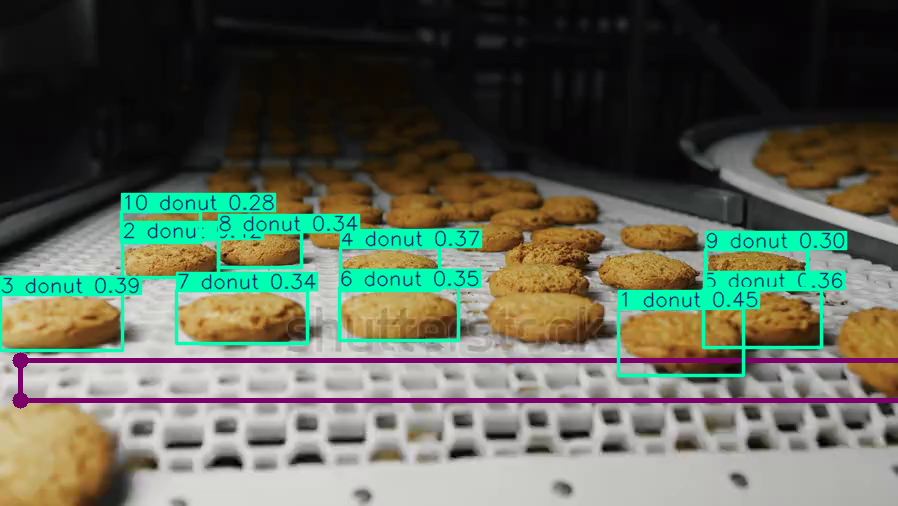

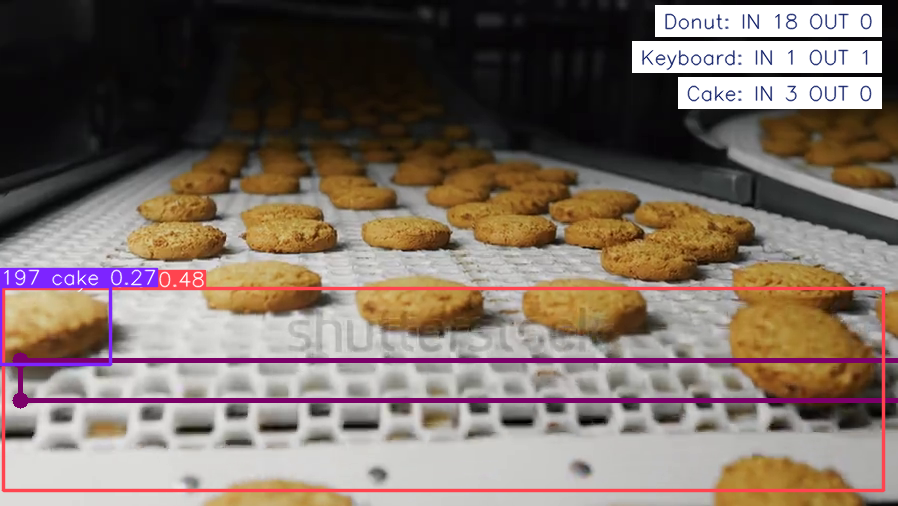

In [8]:
first_frame = None
last_frame = None

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = counter(im0)  # count the objects
    video_writer.write(results.plot_im)   # write the video frames

    # Store the first frame
    if first_frame is None:
        first_frame = results.plot_im

    # Always update last_frame
    last_frame = results.plot_im

cap.release()   # Release the capture
video_writer.release()

# Show the first output
cv2_imshow(first_frame)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()

# Show the last output
cv2_imshow(last_frame)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()


In [ ]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    results = counter(im0)  # count the objects
    video_writer.write(results.plot_im)   # write the video frames

    # Visualize the frame in a window
    cv2_imshow(results.plot_im)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()   # Release the capture
video_writer.release()
cv2.destroyAllWindows()


image 1/1 /content/bus.jpg: 1024x1024 1 0, 1 1, 1764.1ms
Speed: 64.7ms preprocess, 1764.1ms inference, 95.6ms postprocess per image at shape (1, 3, 1024, 1024)


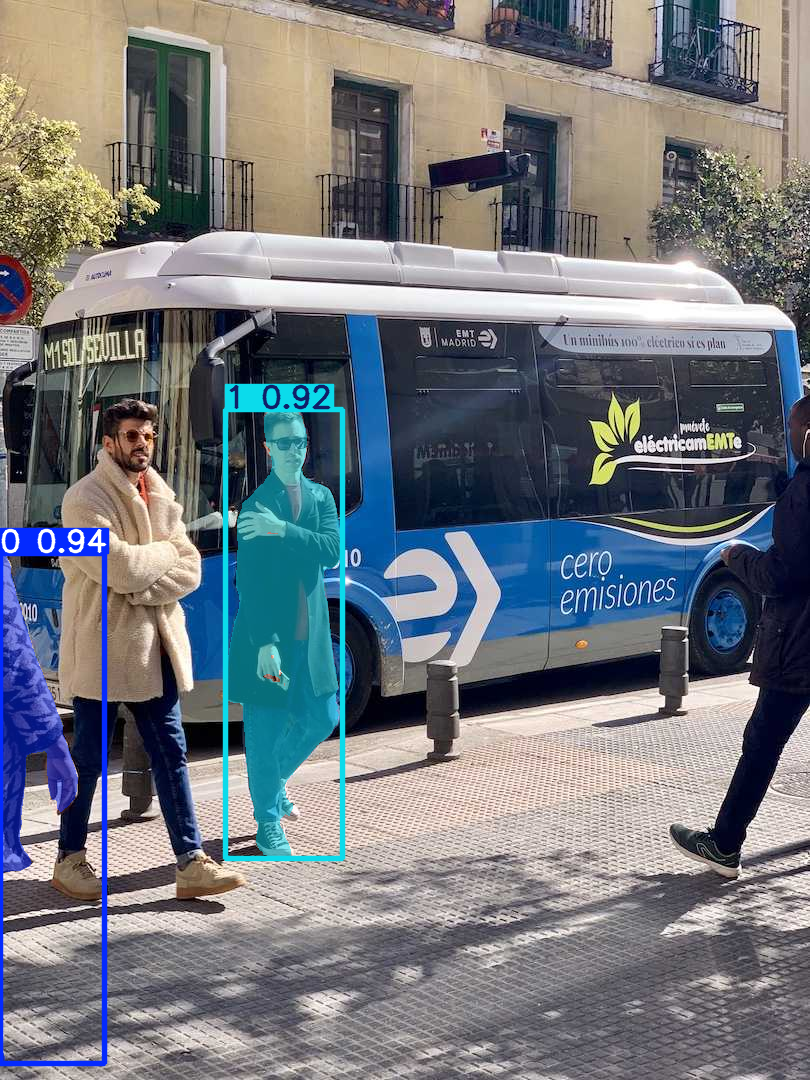

In [6]:
from ultralytics import SAM

# Load a model
model = SAM("sam2.1_b.pt")

# Run inference with multiple point prompts (Provide the points coordinates for
# person area, ensuring that only the person is segmented in the entire image)
results = model("https://ultralytics.com/images/bus.jpg",
                points=[[34, 714], [283, 634]])

results[0].show()  # Display results

In [20]:
import cv2
import os
from pathlib import Path

VIDEO_PATH = "/content/3669014919-preview.mp4"
FRAME_OUTPUT_DIR = Path("video_frames")

# Create the output directory if it doesn't exist
FRAME_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

cap = cv2.VideoCapture(VIDEO_PATH)
frame_count = 0

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Save the frame as a JPEG image
    frame_path = FRAME_OUTPUT_DIR / f"frame_{frame_count:05d}.jpg"
    cv2.imwrite(str(frame_path), frame)
    frame_count += 1

cap.release()
print(f"Extracted {frame_count} frames to {FRAME_OUTPUT_DIR}")

Extracted 262 frames to video_frames


In [10]:
from ultralytics.data.annotator import auto_annotate

# Set your model paths and the directory containing the extracted frames
FRAME_DIR = "/content/video_frames"
DET_MODEL = "yolo11x.pt"
SAM_MODEL = "sam_b.pt"

# Run auto-annotation on the directory of frames
print(f"Starting auto-annotation on images in {FRAME_DIR}...")
auto_annotate(
    data=FRAME_DIR,
    det_model=DET_MODEL,
    sam_model=SAM_MODEL,
    output_dir=f"{FRAME_DIR}_labels" # Annotations will be saved here
)

print(f"Annotation complete. Labels are saved in the {FRAME_DIR}_labels directory.")

Starting auto-annotation on images in /content/video_frames...

image 1/262 /content/video_frames/frame_00000.jpg: 384x640 10 donuts, 62.8ms
image 2/262 /content/video_frames/frame_00001.jpg: 384x640 11 donuts, 37.0ms
image 3/262 /content/video_frames/frame_00002.jpg: 384x640 11 donuts, 39.1ms
image 4/262 /content/video_frames/frame_00003.jpg: 384x640 9 donuts, 36.4ms
image 5/262 /content/video_frames/frame_00004.jpg: 384x640 9 donuts, 38.1ms
image 6/262 /content/video_frames/frame_00005.jpg: 384x640 9 donuts, 38.3ms
image 7/262 /content/video_frames/frame_00006.jpg: 384x640 8 donuts, 38.5ms
image 8/262 /content/video_frames/frame_00007.jpg: 384x640 8 donuts, 36.8ms
image 9/262 /content/video_frames/frame_00008.jpg: 384x640 8 donuts, 40.3ms
image 10/262 /content/video_frames/frame_00009.jpg: 384x640 10 donuts, 38.1ms
image 11/262 /content/video_frames/frame_00010.jpg: 384x640 9 donuts, 39.1ms
image 12/262 /content/video_frames/frame_00011.jpg: 384x640 10 donuts, 38.3ms
image 13/262 /co

In [21]:
import os
from pathlib import Path

# --- Configuration ---
# This MUST match the output_dir you used in auto_annotate
LABEL_DIR = Path("/content/video_frames/labels")
TARGET_CLASS_ID = '0' # Your single class ID for "potato"

print(f"Starting class ID remapping in: {LABEL_DIR}")

files_reformatted = 0
remapping_count = 0

if not LABEL_DIR.is_dir():
    print(f"ERROR: Label directory not found at {LABEL_DIR}")
else:
    # Iterate over all .txt files in the label directory
    for label_file in LABEL_DIR.glob('*.txt'):

        with open(label_file, 'r') as f:
            lines = f.readlines()

        new_lines = []
        is_reformatted = False

        # Process each line (each object annotation)
        for line in lines:
            line = line.strip()
            if not line:
                continue

            parts = line.split()

            # Check if the existing class ID is NOT the target ID
            if parts and parts[0] != TARGET_CLASS_ID:
                # Replace the old class ID (e.g., '54') with the target '0'
                old_class_id = parts[0]
                parts[0] = TARGET_CLASS_ID

                new_lines.append(' '.join(parts) + '\n')
                is_reformatted = True
                remapping_count += 1
            else:
                # Keep lines that already have the correct class ID or are empty
                new_lines.append(line + '\n')

        # Write the modified lines back to the file if any changes were made
        if is_reformatted:
            with open(label_file, 'w') as f:
                f.writelines(new_lines)
            files_reformatted += 1

print("\n--- Summary ---")
print(f"✅ Finished remapping class IDs to {TARGET_CLASS_ID}.")
print(f"Total label files modified: {files_reformatted}")
print(f"Total annotations remapped: {remapping_count}")
print("\nYour labels are now ready for training!")

Starting class ID remapping in: /content/video_frames/labels

--- Summary ---
✅ Finished remapping class IDs to 0.
Total label files modified: 262
Total annotations remapped: 2561

Your labels are now ready for training!


In [22]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="cookies.yaml",    # Path to dataset configuration file
    epochs=10,  # Number of training epochs
    imgsz=640,  # Image size for training
    device="gpu",  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

# Evaluate the model's performance on the validation set


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:gpu (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=cookies.yaml, degrees=0.0, deterministic=True, device=gpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train9, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

In [ ]:
metrics = model.val()

# Perform object detection on an image
results = model("/content/video_frames/frame_00007.jpg")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
path = model.export(format="onnx")  # Returns the path to the exported model